**Francisco Leonid Galvez Flores**

**A01174385**

[**Enlace al repositorio en GitHub**](https://github.com/G4LF0/Evidencia2PortafolioDeImplementacion)

# **Importacion de librerias:**

In [1366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Declaramos nuestras funciones:**

Funcion de transformacion de datos:

In [1367]:
def transformacion(x_train, y_train, x_val, y_val):
  # Transformamos los registros a arreglos numericos pertenecientes a una matriz.
  # Training
  x_train = x_train.to_numpy()
  y_train = y_train.to_numpy().reshape(y_train.size, 1)
  # Validating
  x_val = x_val.to_numpy()
  y_val = y_val.to_numpy().reshape(y_val.size, 1)
  
  # Agregamos las columnas de unos a las matrices x
  # Training
  x_train = np.vstack((np.ones((x_train.shape[0], )), x_train.T)).T
  # Validating
  x_val = np.vstack((np.ones((x_val.shape[0], )), x_val.T)).T
  return x_train, y_train, x_val, y_val

Funcion sigmoide:

In [1368]:
def sigmoid(x):
  s = 1/(1+np.exp(-(x)))
  return s

Funcion del algoritmo de ML:

In [1369]:
def model(x_train, y_train, alpha, iterations):
  n = y_train.size # Registros → Valores de las variables

  theta = np.zeros((x_train.shape[1], 1))

  lista_costo = []
  """
  Creamos un vector con tamaño igual al numero de variables
  estos seran los pesos iniciales de nuestras variables.
  """

  for i in range(iterations):
    sigma = np.dot(x_train, theta) # Prediccion probabilistica
    y_pred = sigmoid(sigma)

    # Funcion de costo
    costo = -(1/n)*np.sum( y_train*np.log(y_pred) + (1-y_train)* np.log(1-y_pred) )

    # Gradiente descendiente
    dTheta = (1/n)*np.dot(x_train.T, y_pred-y_train)

    theta = theta - alpha*dTheta

    # Descenso de nuestra funcion de costo
    lista_costo.append(costo)

    if(i%(iterations/10) == 0): # Comentar
      print("En la iteracion numero", i, "el error es de : ", costo)

    
  return theta, lista_costo

Funcion de grafica costo:

In [1370]:
def grafica_costo(listaCosto, n_iterations):
  rango = np.arange(0, n_iterations)
  plt.plot(rango, listaCosto)
  return plt.show()

Funcion para el accuracy:

In [1371]:
def accuracy(x, y, theta):
  sigma = np.dot(x, theta) # Prediccion probabilistica
  y_pred = sigmoid(sigma)

  y_pred = y_pred > 0.5
  y_pred = np.array(y_pred, dtype = 'int64')
  """
  Con las dos lineas de codigo anteriores convertimos a booleanos
  y luego a un formato binario(0,1), esto recordando que con la
  funcion sigmoide los valores menores a 0.5 se tomaran como 0 
  y los mayores a 0.5 como 1
  """
  acc = (1 - np.sum(np.absolute(y_pred - y))/y.size)*100
  print("La precision del modelo es: ", round(acc, 2), "%")
  return y_pred

In [1372]:
def model_predecir(x, theta):
  sigma = np.dot(x, theta) # Prediccion probabilistica
  y_pred = sigmoid(sigma)
  y_pred = y_pred > 0.5
  y_pred = np.array(y_pred, dtype = 'int64')
  return y_pred

Funcion para la matriz de confusion:

In [1373]:
"""
def matriz_confusion(y,y_pred):
    matrix=np.zeros((2,2)) # Formamos una matriz vacia
    for i in range(len(y)): 
        if int(y[i])==1 and int(y_pred[i])==1:  # Verdaderos positivos
            matrix[1,1]+=1
        elif int(y[i])==0 and int(y_pred[i])==1: #Falsos positivos
            matrix[0,1]+=1
        elif int(y[i])==1 and int(y_pred[i])==0: # Falsos negativos
            matrix[1,0]+=1
        elif int(y[i])==0 and int(y_pred[i])==0: #Verdaderos negativos
            matrix[0,0]+=1 
    tp = matrix[0,0] # TP 
    fp = matrix[0,1] # FP
    fn = matrix[1,0] # FN
    tn = matrix[1,1] # TN
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    print("Accuracy",accuracy)

    precision= (tp)/(tp+fp) 
    print("Precision:",precision)
    
    sensibilidad = (tp)/(tp+fn)
    print("Recall:", sensibilidad)

    specificity = (tn)/(tn+fp)
    print("Specificity:",specificity)

    f1 = 2*(precision * sensibilidad)/(precision + sensibilidad)
    print("F1:", f1)

    return matrix
"""

'\ndef matriz_confusion(y,y_pred):\n    matrix=np.zeros((2,2)) # Formamos una matriz vacia\n    for i in range(len(y)): \n        if int(y[i])==1 and int(y_pred[i])==1:  # Verdaderos positivos\n            matrix[1,1]+=1\n        elif int(y[i])==0 and int(y_pred[i])==1: #Falsos positivos\n            matrix[0,1]+=1\n        elif int(y[i])==1 and int(y_pred[i])==0: # Falsos negativos\n            matrix[1,0]+=1\n        elif int(y[i])==0 and int(y_pred[i])==0: #Verdaderos negativos\n            matrix[0,0]+=1 \n    tp = matrix[0,0] # TP \n    fp = matrix[0,1] # FP\n    fn = matrix[1,0] # FN\n    tn = matrix[1,1] # TN\n    accuracy = (tp+tn)/(tp+fp+fn+tn)\n    print("Accuracy",accuracy)\n\n    precision= (tp)/(tp+fp) \n    print("Precision:",precision)\n    \n    sensibilidad = (tp)/(tp+fn)\n    print("Recall:", sensibilidad)\n\n    specificity = (tn)/(tn+fp)\n    print("Specificity:",specificity)\n\n    f1 = 2*(precision * sensibilidad)/(precision + sensibilidad)\n    print("F1:", f1)\n

El codigo anterior señala como debe ser correctamente, el detalle aqui es como lo hicimos para n variables, le hicimos transformacion a los datos y estos estan afectando los resultados.

In [1374]:
def matriz_confusion(y,y_pred):
    matrix=np.zeros((2,2)) # Formamos una matriz vacia
    for i in range(len(y)): 
        if int(y[i])==1 and int(y_pred[i])==1:  # Verdaderos positivos
            matrix[1,1]+=1
        elif int(y[i])==0 and int(y_pred[i])==1: #Falsos positivos
            matrix[0,1]+=1
        elif int(y[i])==1 and int(y_pred[i])==0: # Falsos negativos
            matrix[1,0]+=1
        elif int(y[i])==0 and int(y_pred[i])==0: #Verdaderos negativos
            matrix[0,0]+=1 
    tp = matrix[1,1] # TP 
    fp = matrix[0,1] # FP
    fn = matrix[1,0] # FN
    tn = matrix[0,0] # TN
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    print("Accuracy",accuracy)

    precision= (tp)/(tp+fp) 
    print("Precision:",precision)
    
    sensibilidad = (tp)/(tp+fn)
    print("Recall:", sensibilidad)

    specificity = (tn)/(tn+fp)
    print("Specificity:",specificity)

    f1 = 2*(precision * sensibilidad)/(precision + sensibilidad)
    print("F1:", f1)

    return matrix

Funcion para la division de datos:

In [1375]:
def division(df, p_train):
  # p_train = 0.70  Porcentaje de train.

  df['is_train'] = np.random.uniform(0, 1, len(df)) <= p_train
  train, val = df[df['is_train']==True], df[df['is_train']==False]
  df = df.drop('is_train', 1)
  train = train.drop(["is_train"], axis = 1)
  val = val.drop(["is_train"], axis = 1)
  return train, val

# **Importamos la base de datos:**

In [1376]:
url = "https://raw.githubusercontent.com/G4LF0/Evidencia2PortafolioDeImplementacion/main/breast-cancer.csv"
df = pd.read_csv(url)
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [1377]:
df = df.drop(["id"], axis = 1)
df.diagnosis = df.diagnosis.map({"M":1, "B":0})
df.shape

(569, 31)

Realizamos un heatmap para ver que variables estan influyen mas, ya sea positiva o negativamente sobre nuestra variable dependiente, que en este caso sera 'diagnosis'.

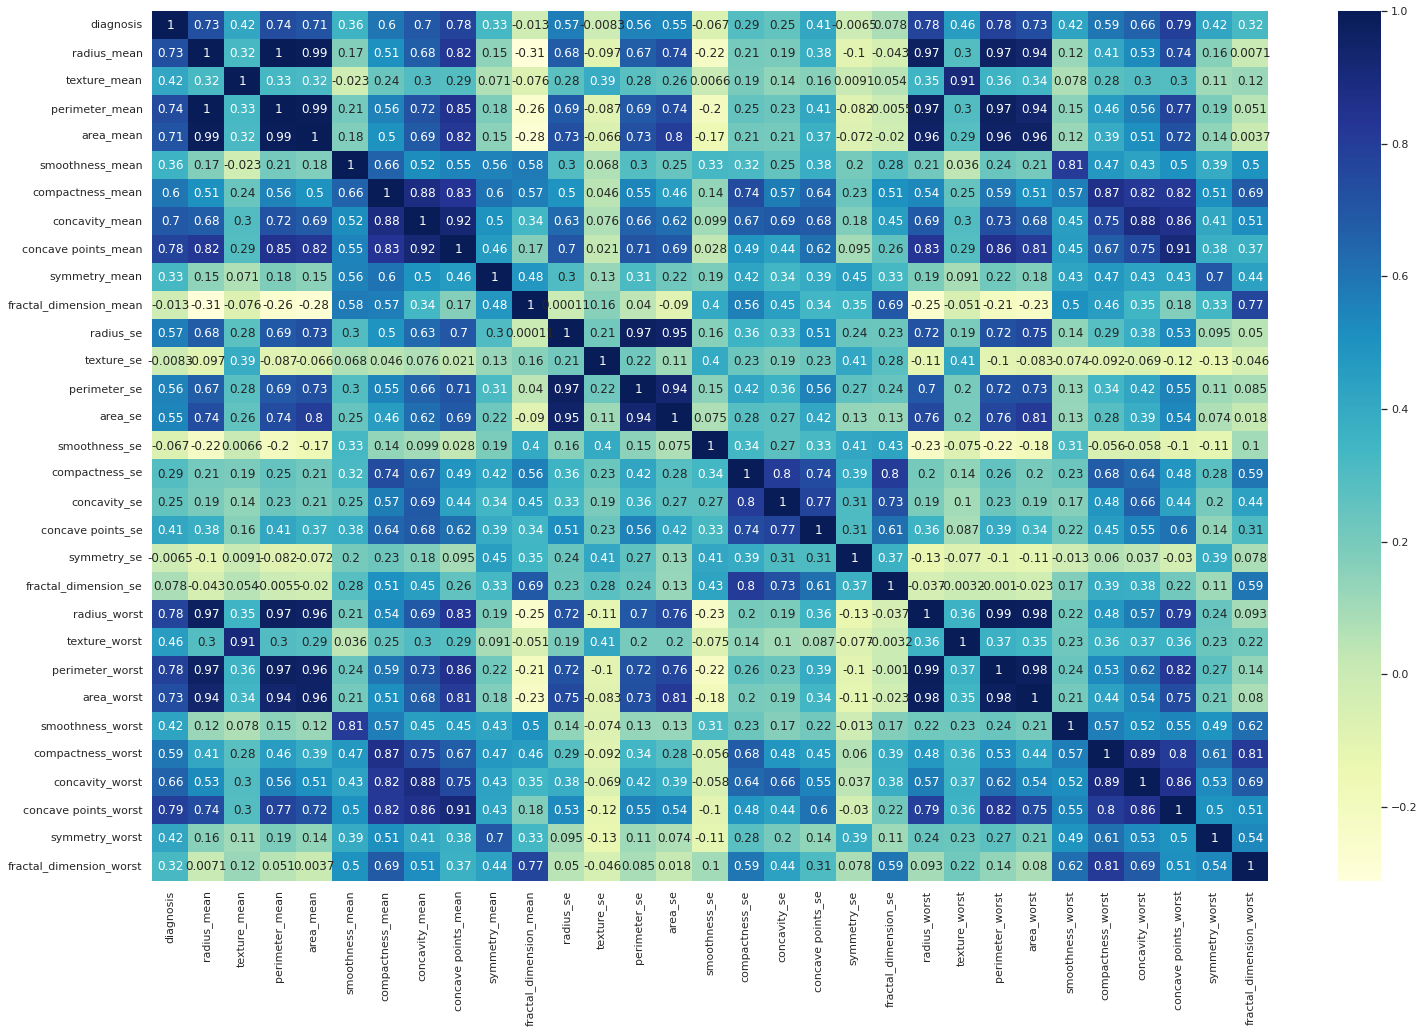

In [1378]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

Eliminamos las columnas que tienen minima relacion o relacion nula con nuestra variable a predecir.

In [1379]:
df = df.drop(["texture_mean",
              "smoothness_mean",
              "compactness_mean",
              "symmetry_mean",
              "fractal_dimension_mean",
              "radius_se",
              "texture_se",
              "perimeter_se",
              "area_se",
              "smoothness_se",
              "compactness_se",
              "concavity_se",
              "concave points_se",
              "symmetry_se",
              "fractal_dimension_se",
              "texture_worst",
              "smoothness_worst",
              "compactness_worst",
              "concavity_worst",
              "symmetry_worst",
              "fractal_dimension_worst"], axis = 1)
df.head(1)

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,1,17.99,122.8,1001.0,0.3001,0.1471,25.38,184.6,2019.0,0.2654


Volvemos a realizar un heatmap:

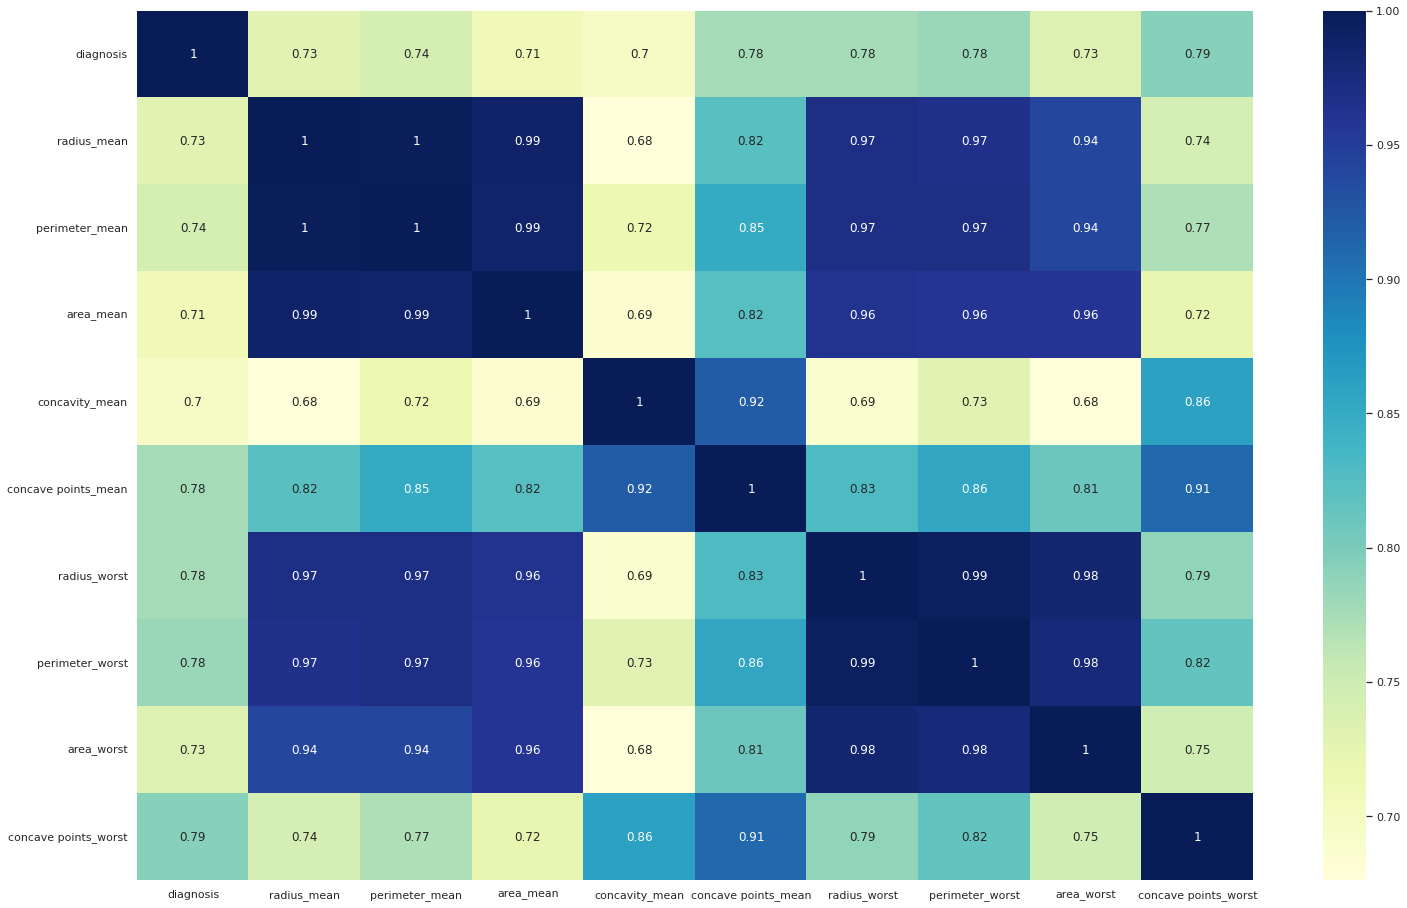

In [1380]:
sns.set(rc = {'figure.figsize':(25,16)})
sns.heatmap(df.corr(), annot=True, cmap= 'YlGnBu')

# **Division del dataset:**

Dividiremos el dataframe a mano con ayuda de la libreria numpy, se divide de manera aleatoria, 70% del dataframe sera para training y 30% para validating.

In [1381]:
p_train = 0.90
train, test = division(df, p_train)
p_train_2 = 0.70
train, val = division(train, p_train_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [1382]:
train.head(2)

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,1,17.99,122.8,1001.0,0.3001,0.14710,25.38,184.6,2019.0,0.2654
1,1,20.57,132.9,1326.0,0.0869,0.07017,24.99,158.8,1956.0,0.1860


In [1383]:
val.head(2)

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
4,1,20.29,135.1,1297.0,0.19800,0.10430,22.54,152.2,1575.0,0.1625
13,1,15.85,103.7,782.7,0.09938,0.05364,16.84,112.0,876.5,0.1119


In [1384]:
df_mcd = pd.DataFrame({"Datos: ":["Training", "Validating", "Testing"],
                       "Registros": [train.shape[0], val.shape[0], test.shape[0]]})
df_mcd

,Datos:,Registros
0,Training,359
1,Validating,149
2,Testing,61


Declaramos nuestras variables dependientes y la variable independiente tanto en el dataframe de training como en el de testing.

Training:

In [1385]:
x_train = train.drop(["diagnosis"], axis = 1)
y_train = train[["diagnosis"]]

Validating:

In [1386]:
x_val = val.drop(["diagnosis"], axis = 1)
y_val = val[["diagnosis"]]

# **Implementacion del algoritmo:**

Transformamos los datos con las ecuaciones matematicas:

In [1387]:
x_train, y_train, x_val, y_val = transformacion(x_train, y_train, x_val, y_val)

Algoritmo de regresion logistica:

In [1388]:
iterations = 10000
alpha = 0.0000015 # Cantidad de ceros: 9
theta, lista_costo = model(x_train, y_train, alpha, iterations)

En la iteracion numero 0 el error es de :  0.6931471805599453
En la iteracion numero 1000 el error es de :  0.44911014564646784
En la iteracion numero 2000 el error es de :  0.3823204362512506
En la iteracion numero 3000 el error es de :  0.343905113497758
En la iteracion numero 4000 el error es de :  0.31783965848573664
En la iteracion numero 5000 el error es de :  0.29899781939825115
En la iteracion numero 6000 el error es de :  0.2849645128411644
En la iteracion numero 7000 el error es de :  0.2742719483089129
En la iteracion numero 8000 el error es de :  0.26593486827506835
En la iteracion numero 9000 el error es de :  0.2592901862865634


Graficamos la disminucion del error segun el numero de iteraciones para ver en que momento existe un estancamiento del algoritmo.

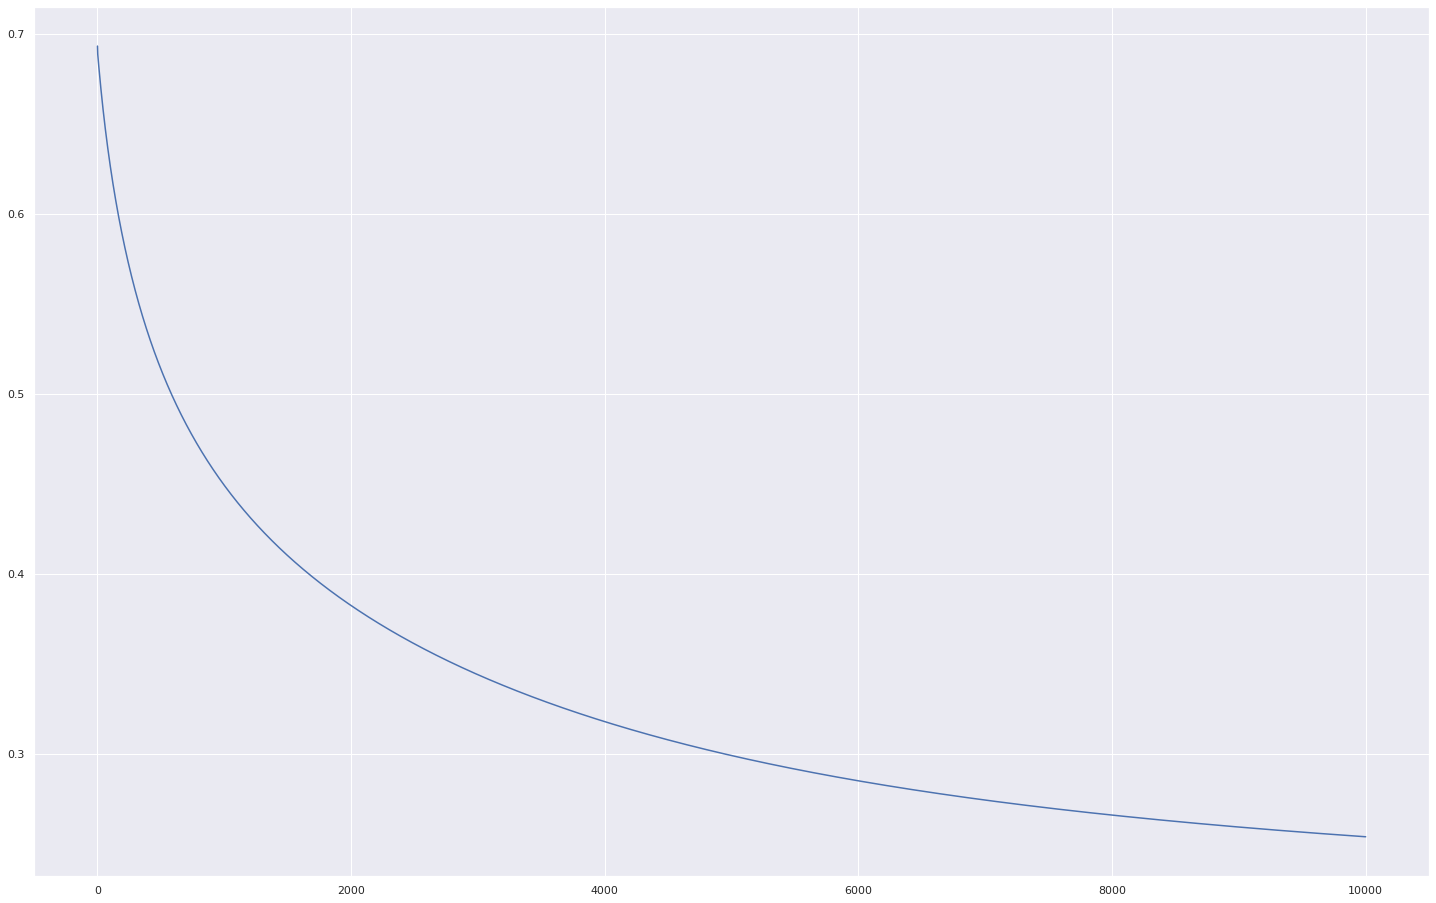

In [1389]:
plt.plot(np.arange(iterations), lista_costo)
plt.show()

# **Accuracy**

Ahora veremos la precision del modelo tanto para el dataset de training como para el de validating.

Calculamos la precision en el dataset de entrenamiento:

In [1390]:
y_pred_train = accuracy(x_train, y_train, theta)

La precision del modelo es:  91.09 %


In [1391]:
y_pred_val = accuracy(x_val, y_val, theta)

La precision del modelo es:  92.62 %


# **Pruebas a mano:**

In [1392]:
matriz_confusion(y_train, y_pred_train)

Accuracy 0.9108635097493036
Precision: 0.9339622641509434
Recall: 0.7983870967741935
Specificity: 0.9702127659574468
F1: 0.8608695652173912


array([[228.,   7.],
       [ 25.,  99.]])

In [1393]:
matriz_confusion(y_val, y_pred_val)

Accuracy 0.9261744966442953
Precision: 0.9629629629629629
Recall: 0.8524590163934426
Specificity: 0.9772727272727273
F1: 0.9043478260869565


array([[86.,  2.],
       [ 9., 52.]])

# **Pruebas con librerias:**

In [1394]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_train)

array([[228,   7],
       [ 25,  99]])

In [1395]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

0.9108635097493036

In [1396]:
from sklearn.metrics import precision_score
precision_score(y_train, y_pred_train, average='binary')

0.9339622641509434

In [1397]:
from sklearn.metrics import recall_score
recall_score(y_train, y_pred_train, average='binary')

0.7983870967741935

In [1398]:
recall_score(y_train, y_pred_train, pos_label=0)

0.9702127659574468

In [1399]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred_train)

0.8608695652173912

In [1400]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       235
           1       0.93      0.80      0.86       124

    accuracy                           0.91       359
   macro avg       0.92      0.88      0.90       359
weighted avg       0.91      0.91      0.91       359



# **Predicciones:**

In [1401]:
x_val.shape

(149, 10)

In [1402]:
l = np.random.randint(low=0, high=174)
x_pred = x_val[l:l+5]

In [1403]:
y_pred = model_predecir(x_pred, theta)

In [1404]:
y_pred

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [1405]:
pd.DataFrame({"Numero de prediccion":["1", "2", "3", "4", "5"],
              "Prediccion":[y_pred[0][0], y_pred[1][0], y_pred[2][0], y_pred[3][0], y_pred[4][0]]})

,Numero de prediccion,Prediccion
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
